# Jupyter Notebook Tutorial 

Roughly, the design idea of ``mdciao`` is that:

* The [CLI](http://proteinformatics.uni-leipzig.de/mdciao/cli_cli/cli_cli.html) offers pre-packaged analysis pipelines that are essentially *one-shot* tools. They are an entry-point for non-experts and do not require any Python scripting knowledge. CLI tools are still highly customizable (check ``mdc_*.py -h`` or ``mdc_examples.py``), but offer **only some** of the ``mdciao``-functionalities.
  
* The [Python API](http://proteinformatics.uni-leipzig.de/mdciao/api/api.html), on the other hand, exposes:
   - **CLI-equivalent** functions via the ``mdciao.cli`` [submodule](http://proteinformatics.uni-leipzig.de/mdciao/cli_cli/cli_cli.html). Here you'll find evertying that the CLI offers, only as regular Python functions. This provides scripting flexibility, with the added value that now input and outputs are *normal* Python objects that can be further manipulated, by ``mdciao`` or any other Python module of your liking.
   - Other **standalone submodules** that the CLI uses *under the hood*, and that the user can access directly for any other scripting purpuse: plotting methods, alignment/sequence methods, nomenclature methods, PDB-methods etc.

<div class="alert alert-info">
    
<b>Note</b> 
    
**The API has reached stable status**. Future changes/breaks should be easy to handle if you are using mdciao in API mode.

</div>

For clarity, this notebook loosely follows the same structure as the [Overview](http://proteinformatics.uni-leipzig.de/mdciao/overview.html) section of the ``mdciao``documentation. Other notebooks deal with concepts beyond this and/or advanced pipelines.

If you want to run this notebook on your own, please download and extract the data from [here](http://proteinformatics.org/mdciao/mdciao_example.zip) first. You can download it:

* using the browser 
* using the terminal with  
 ```wget http://proteinformatics.org/mdciao/mdciao_example.zip; unzip mdciao_example.zip```
* using  mdciao's own method [mdciao.examples.fetch_example_data](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.examples.fetch_example_data.html#mdciao-examples-fetch-example-data)

If you want to take a 3D-look at this data, you can do it [here](http://proteinformatics.uni-leipzig.de/mdsrv.html?load=file://base/mdciao/gs-b2ar.ngl).

In [1]:
import mdciao, os
if not os.path.exists("mdciao_example"):
    mdciao.examples.fetch_example_data()

Unzipping to 'mdciao_example'


## Basic Usage
Now we replicate the CLI command:

```
mdc_neighborhoods.py top.pdb traj.xtc --residues L394 -nf #nf: don't use fragments
```

but in API mode. We use the method [cli.residue_neighborhoods](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.residue_neighborhoods.html#mdciao.cli.residue_neighborhoods):

Will compute contact frequencies for (1 items):
mdciao_example/traj.xtc
 with a stride of 1 frames
Using method 'None' these fragments were found
fragment 0 with   1044 AAs     LEU4 (   0) -   P0G395 (1043) (0) resSeq jumps

Will compute neighborhoods for the residues
L394
excluding 4 nearest neighbors

   residue      residx    fragment      resSeq
    LEU394         353           0         394

Performing a first pass on 1039 residue pairs to compute lower bounds on residue-residue distances via residue-COM distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…


Reduced to only 43 residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…



L394@frag0:
The following 6 contacts capture 5.26 (~97%) of the total frequency 5.43 (over 9 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 6 ctcs already capture 90.0% of 5.43.
The 6-th contact has a frequency of 0.52.
   freq          label            residues  fragments   sum
1  1.00  L394@frag0 - L388@frag0  353 - 347    0 - 0   1.00
2  1.00  L394@frag0 - R389@frag0  353 - 348    0 - 0   2.00
3  0.97  L394@frag0 - L230@frag0  353 - 957    0 - 0   2.97
4  0.97  L394@frag0 - R385@frag0  353 - 344    0 - 0   3.94
5  0.80  L394@frag0 - I233@frag0  353 - 960    0 - 0   4.74
6  0.52  L394@frag0 - K270@frag0  353 - 972    0 - 0   5.26
The following files have been created:
./neighborhood.overall@4.5_Ang.pdf
./neighborhood.LEU394@frag0@4.5_Ang.dat
./neighborhood.LEU394@frag0.time_trace@4.5_Ang.pdf


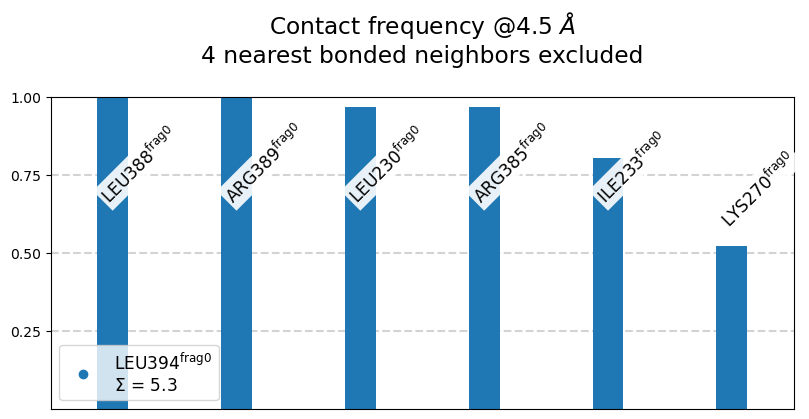

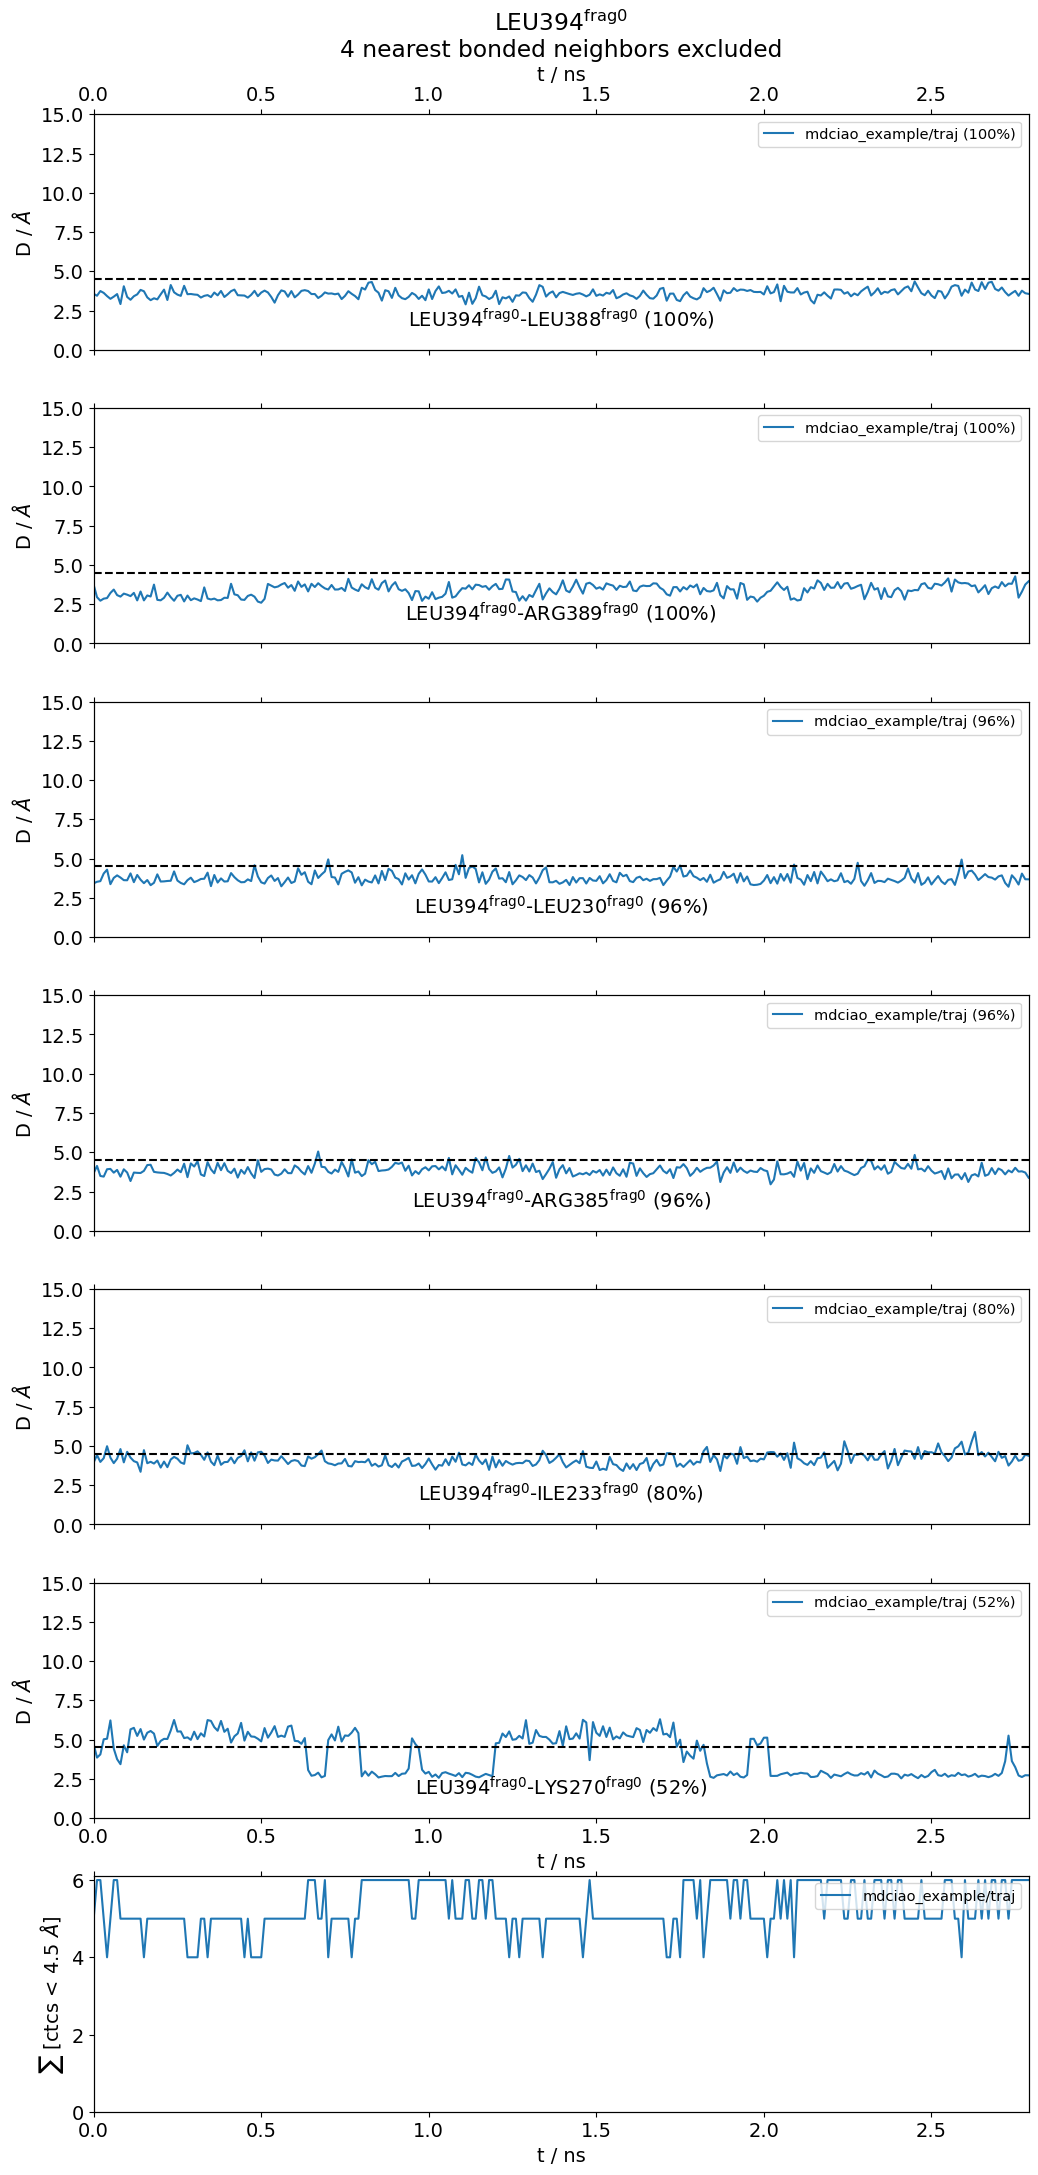

In [2]:
neighborhoods = mdciao.cli.residue_neighborhoods("L394",
                                                 "mdciao_example/traj.xtc", 
                                                 topology="mdciao_example/top.pdb", 
                                                 fragments=None)

``neighborhoods`` is a dictionary keyed with residue indices and valued with a [ContactGroup](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) for each residue neighborhood. 

[ContactGroups](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) are ``mdciao`` classes that allow the further manipulation of contact data, molecular information and much more. Check here to learn more about ``mdciao`` [classes](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.contacts.html).

In [3]:
neighborhoods[353]

## Using Python Objects
Please note that in API mode, inputs can be objects, for example ``mdtraj`` [Trajectories](https://mdtraj.org/1.9.4/api/generated/mdtraj.Trajectory.html). So, before calling the next ``mdciao.cli`` method, we use ``mdtraj`` to load the trajectory from our files:

In [4]:
import mdtraj as md
traj = md.load("mdciao_example/traj.xtc", top="mdciao_example/top.pdb")
traj

<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells at 0x79d262370310>

And we repeat the above command using the ``traj`` object. Please note that we're also using the ``no_disk`` option so that no files are written to disk, in case we're only interested in working in memory.

Will compute contact frequencies for (1 items):
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'None' these fragments were found
fragment 0 with   1044 AAs     LEU4 (   0) -   P0G395 (1043) (0) resSeq jumps

Will compute neighborhoods for the residues
L394
excluding 4 nearest neighbors

   residue      residx    fragment      resSeq
    LEU394         353           0         394

Performing a first pass on 1039 residue pairs to compute lower bounds on residue-residue distances via residue-COM distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…


Reduced to only 43 residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…



L394@frag0:
The following 6 contacts capture 5.26 (~97%) of the total frequency 5.43 (over 9 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 6 ctcs already capture 90.0% of 5.43.
The 6-th contact has a frequency of 0.52.
   freq          label            residues  fragments   sum
1  1.00  L394@frag0 - L388@frag0  353 - 347    0 - 0   1.00
2  1.00  L394@frag0 - R389@frag0  353 - 348    0 - 0   2.00
3  0.97  L394@frag0 - L230@frag0  353 - 957    0 - 0   2.97
4  0.97  L394@frag0 - R385@frag0  353 - 344    0 - 0   3.94
5  0.80  L394@frag0 - I233@frag0  353 - 960    0 - 0   4.74
6  0.52  L394@frag0 - K270@frag0  353 - 972    0 - 0   5.26


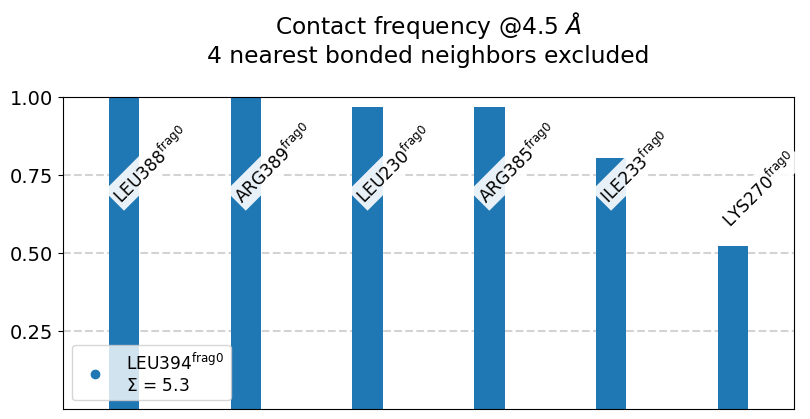

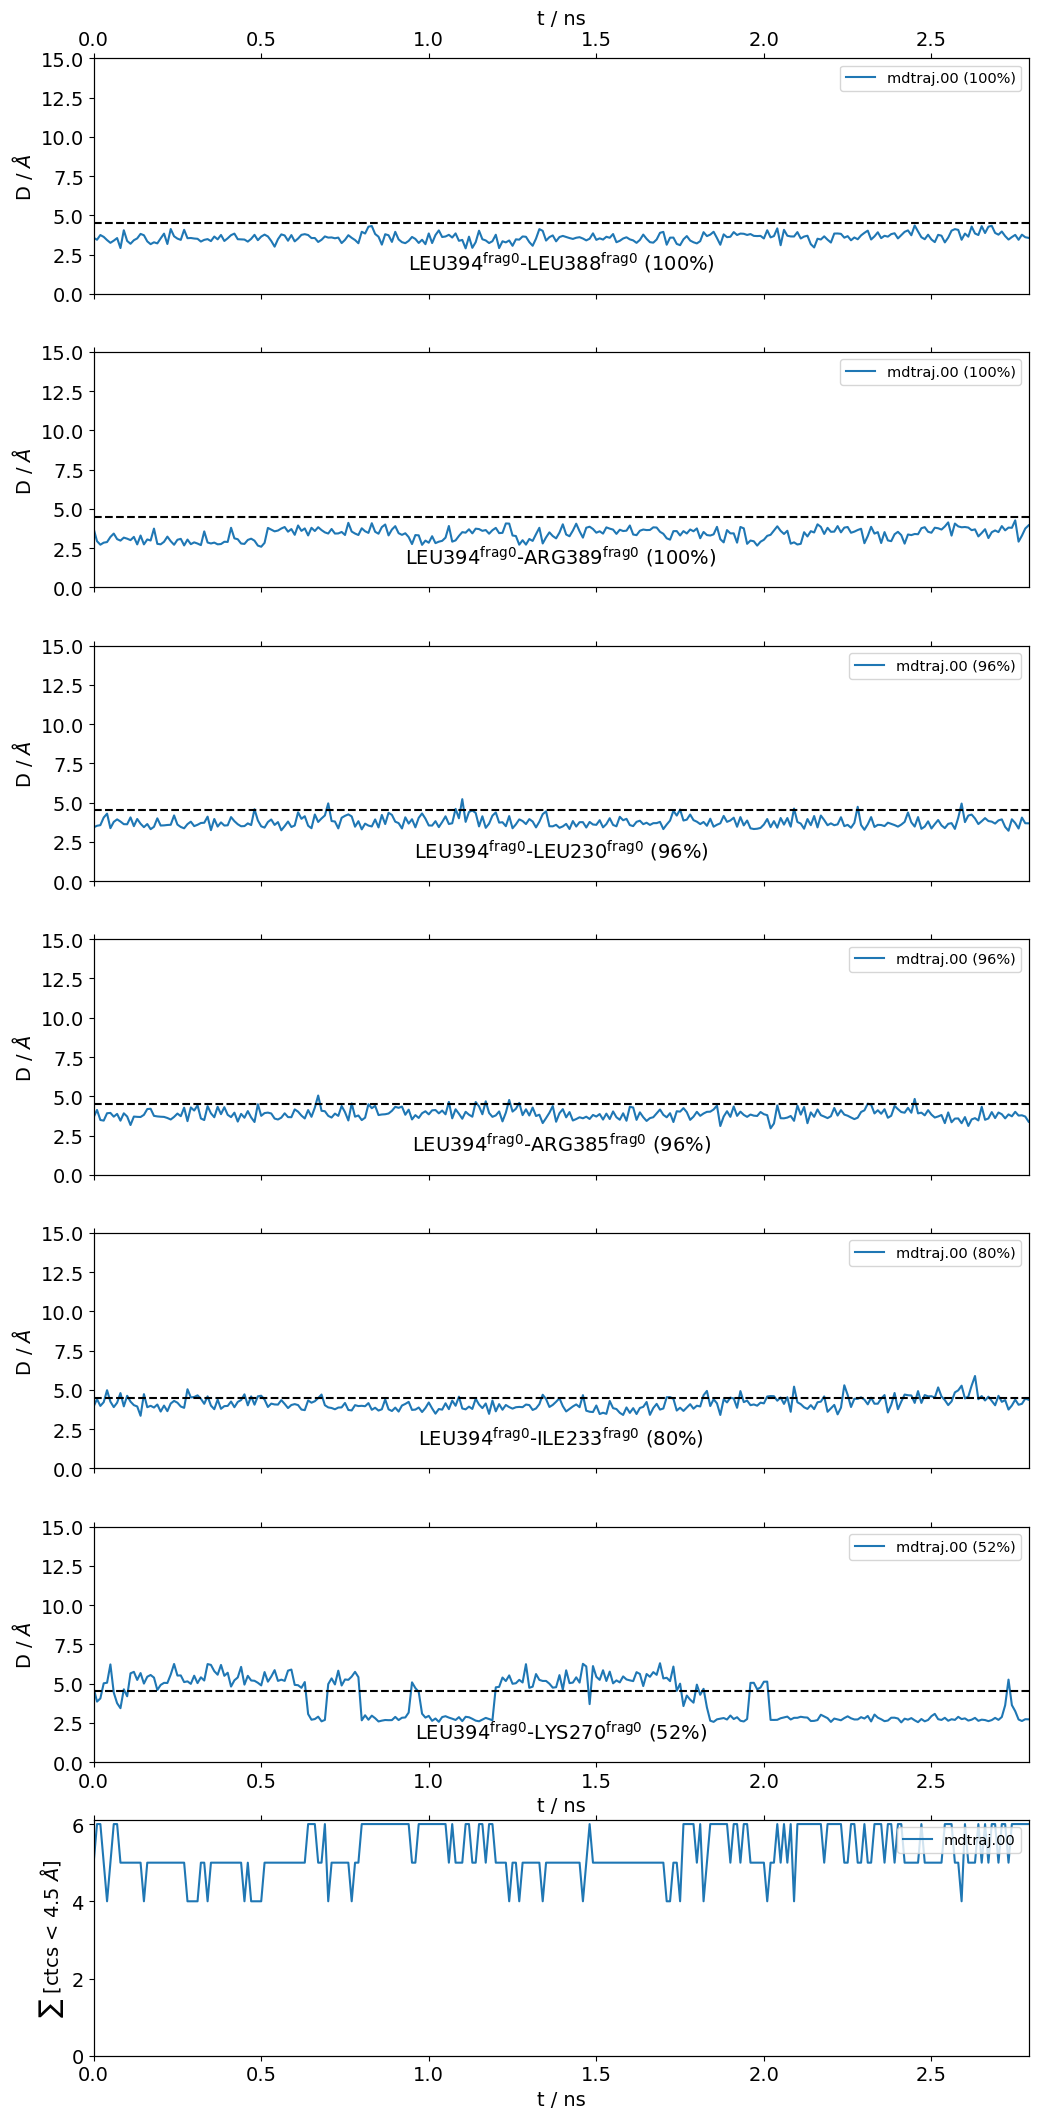

In [5]:
neighborhoods = mdciao.cli.residue_neighborhoods("L394",
                                                 traj,
                                                 fragments=None,
                                                 no_disk=True)

Now, the more elaborated CLI-command:

```
mdc_neighborhoods.py top.pdb traj.xtc -r L394 --GPCR adrb2_human --CGN gnas2_human -ni -at #ni: not interactive, at: show atom-types
```

We keep the ``no_disk`` option to avoid writing to disk, but you can change this if you want. **Please note** that some options **do not carry** exactly the same names as their CLI equivalents. E.g. ``ni`` in the CLI (= *don't be interactive*) is now ``accept_guess`` in the API. These differences are needed for compatiblity with other methods, but might get unified in the future. 

Will compute contact frequencies for (1 items):
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment 0 with    354 AAs     LEU4 (   0) -   LEU394 (353 ) (0) resSeq jumps
fragment 1 with    340 AAs     GLN1 ( 354) -   ASN340 (693 ) (1)
fragment 2 with     66 AAs     ALA2 ( 694) -    PHE67 (759 ) (2)
fragment 3 with    283 AAs    GLU30 ( 760) -   LEU340 (1042) (3) resSeq jumps
fragment 4 with      1 AAs   P0G395 (1043) -   P0G395 (1043) (4)
No local file ./adrb2_human.xlsx found, checking online in
https://gpcrdb.org/services/residues/extended/adrb2_human ...done!
Please cite the following reference to the GPCRdb:
 * Kooistra et al, (2021) GPCRdb in 2021: Integrating GPCR sequence, structure and function
   Nucleic Acids Research 49, D335--D343
   https://doi.org/10.1093/nar/gkaa1080
For more information, call mdciao.nomenclature.references()
The GPCR-labels align best with 

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…


Reduced to only 43 residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…



L394@G.H5.26:
The following 6 contacts capture 5.26 (~97%) of the total frequency 5.43 (over 9 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 6 ctcs already capture 90.0% of 5.43.
The 6-th contact has a frequency of 0.52.
   freq            label              residues  fragments   sum
1  1.00  L394@G.H5.26 - L388@G.H5.20  353 - 347    0 - 0   1.00
2  1.00  L394@G.H5.26 - R389@G.H5.21  353 - 348    0 - 0   2.00
3  0.97  L394@G.H5.26 - L230@5.69x69  353 - 957    0 - 3   2.97
4  0.97  L394@G.H5.26 - R385@G.H5.17  353 - 344    0 - 0   3.94
5  0.80  L394@G.H5.26 - I233@5.72x72  353 - 960    0 - 3   4.74
6  0.52  L394@G.H5.26 - K270@6.32x32  353 - 972    0 - 3   5.26


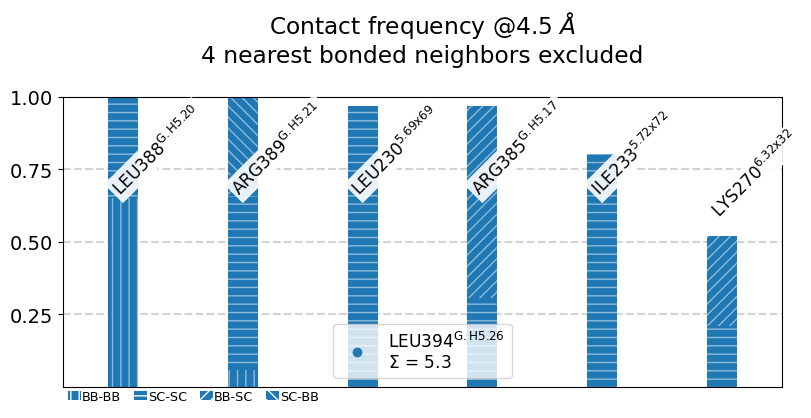

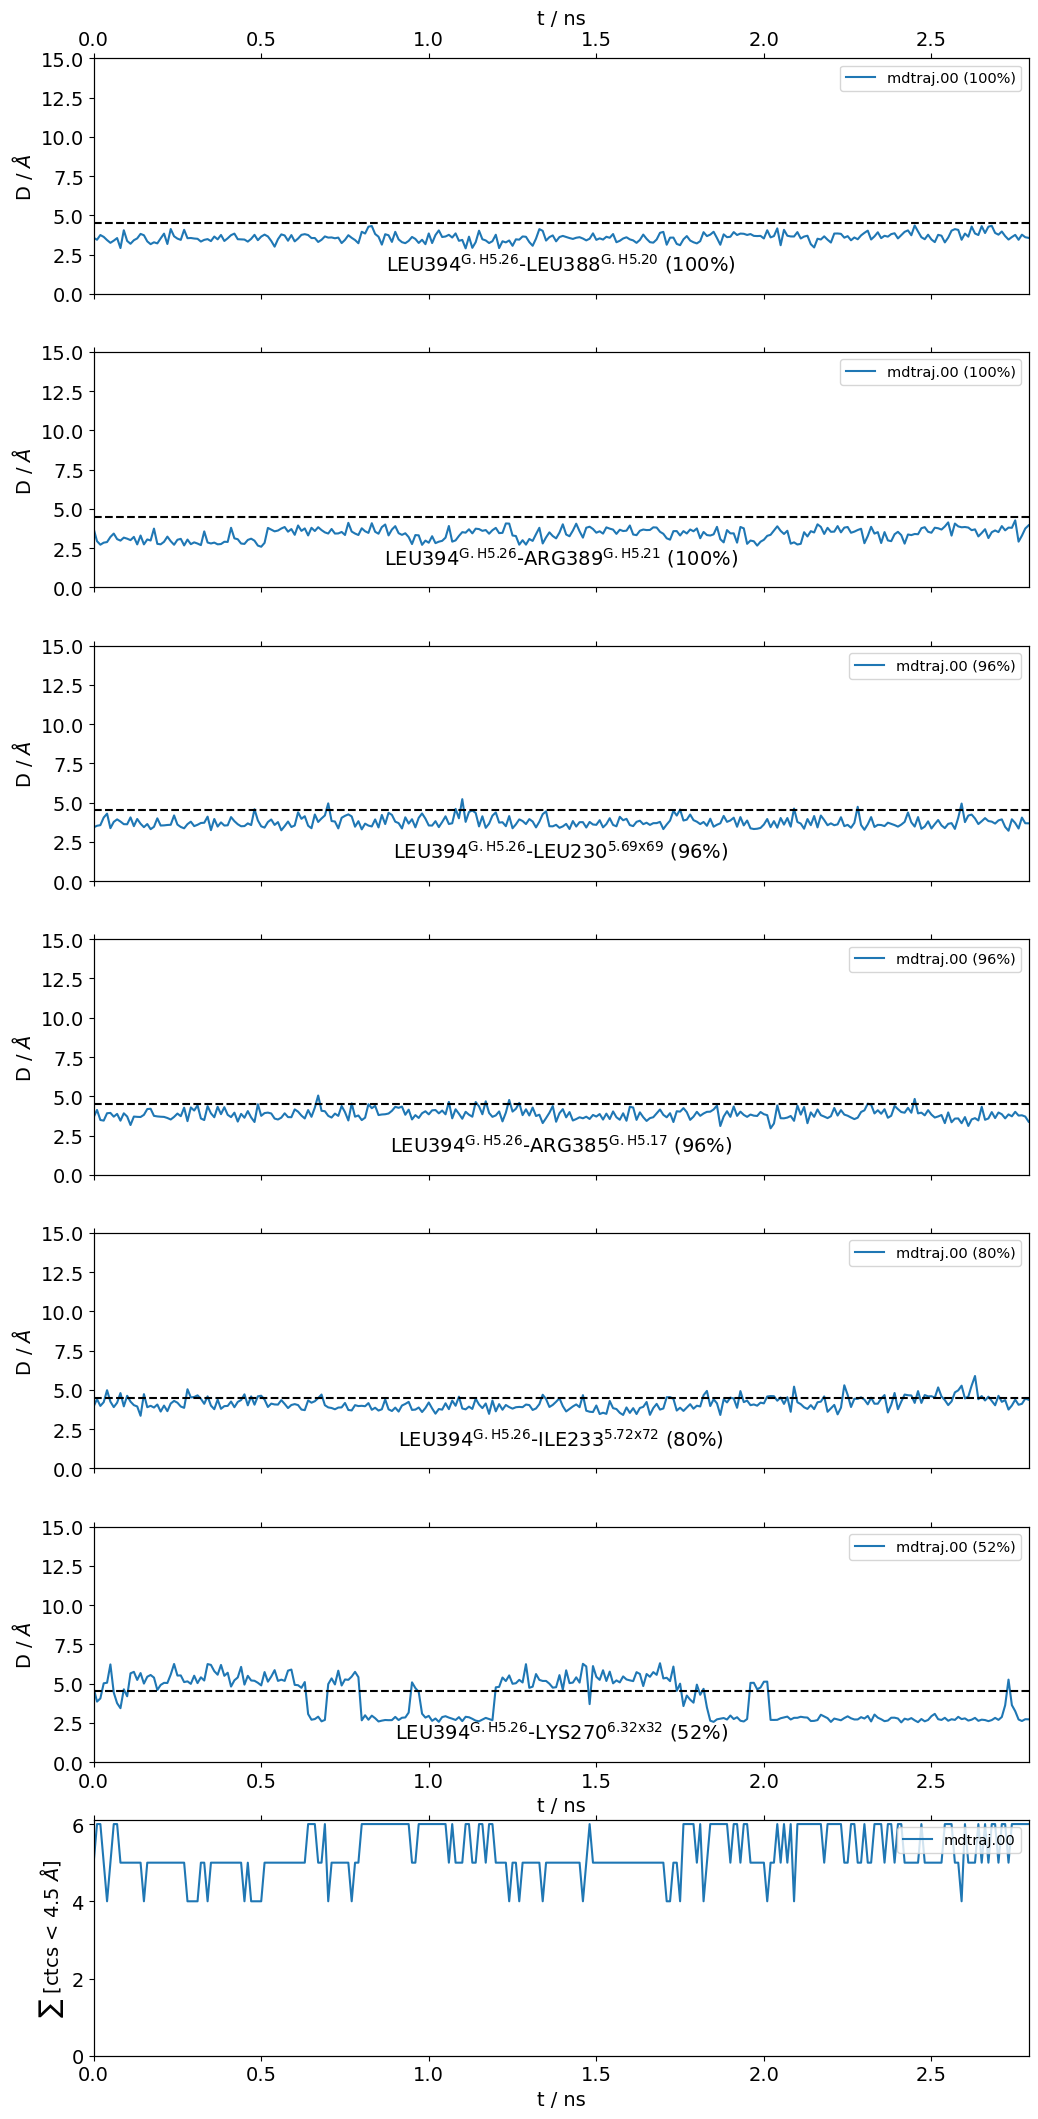

In [6]:
neighborhoods = mdciao.cli.residue_neighborhoods("L394",
                                                 traj,
                                                 GPCR_UniProt="adrb2_human",
                                                 CGN_UniProt="gnas2_human",
                                                 accept_guess=True,
                                                 plot_atomtypes=True,
                                                 no_disk=True)

## Consensus Nomenclature: GPCR and/or CGN
Above, we declared our intention to use GPCR consensus nomenclature and Common G-alpha Numbering (CGN) by passing the descriptor strings ``GPCR_UniProt="adrb2_human"`` or ``CGN_UniProt="gnas2_human"``, respectively, to contact the online databases, in particular the  

* [GPCRdb](https://gpcrdb.org/), Kooistra et al, (2021) GPCRdb in 2021: Integrating GPCR sequence, structure and function, Nucleic Acids Research 49, D335--D343, https://doi.org/10.1093/nar/gkaa1080

For that retrieval and handling of these labels, we use the [module](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.nomenclature.html) ``mdciao.nomenclature``, which offers [classes](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.nomenclature.html#classes) and other helper functions to deal with the nomenclature. An overview of the relevant references is contained in [the module's documentation](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.nomenclature.html) as well as in the documentation of each class, e.g. [here](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.nomenclature.LabelerGPCR.html#mdciao.nomenclature.LabelerGPCR).

Additionally, you can use [mdciao.nomenclature.references](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.nomenclature.references.html) to print all relevant nomenclature references:

In [7]:
mdciao.nomenclature.references()

mdciao.nomenclature functions thanks to these online databases. Please cite them if you use this module:
 * Kooistra et al, (2021) GPCRdb in 2021: Integrating GPCR sequence, structure and function
   Nucleic Acids Research 49, D335--D343
   https://doi.org/10.1093/nar/gkaa1080
 * Berman et al, (2000) The Protein Data Bank
   Nucleic Acids Research 28, 235--242
   https://doi.org/10.1093/NAR/28.1.235
 * Flock et al, (2015) Universal allosteric mechanism for G$\alpha$ activation by GPCRs
   Nature 2015 524:7564 524, 173--179
   https://doi.org/10.1038/nature14663
 * Kanev et al, (2021) KLIFS: an overhaul after the first 5 years of supporting kinase research
   Nucleic Acids Research 49, D562--D569
   https://doi.org/10.1093/NAR/GKAA895

Additionally, depending on the chosen nomenclature type, you should cite:
 * Structure based GPCR notation
   - Isberg et al, (2015) Generic GPCR residue numbers - Aligning topology maps while minding the gaps
     Trends in Pharmacological Sciences 36, 2

The nomenclature classes produce standalone objects, and can do much more than just be inputs to `mdciao.cli` methods. As with any Python class, you can learn a lot about its methods and attributes by using the [tab autocompletion feature of IPython](https://ipython.org/ipython-doc/dev/interactive/tutorial.html#tab-completion). Or you can check [here](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.nomenclature.html) for more ``mdciao`` docs. 

Since we'll be using these labels more than once in the notebook, instead of using the network each time, we can have them as Python objects in memory. Alternatively, it's possible to save the labeling data locally after the first database query. This allows for inspection and re-use of the retrieved data outside the notebook (in a spreadsheet, for example).

In [8]:
from mdciao import nomenclature
GPCR = nomenclature.LabelerGPCR("adrb2_human", 
                            #write_to_disk=True 
                           )
CGN = nomenclature.LabelerCGN("gnas2_human", 
                             # write_to_disk=True
                             )

No local file ./adrb2_human.xlsx found, checking online in
https://gpcrdb.org/services/residues/extended/adrb2_human ...done!
Please cite the following reference to the GPCRdb:
 * Kooistra et al, (2021) GPCRdb in 2021: Integrating GPCR sequence, structure and function
   Nucleic Acids Research 49, D335--D343
   https://doi.org/10.1093/nar/gkaa1080
For more information, call mdciao.nomenclature.references()
No local file ./gnas2_human.xlsx found, checking online in
https://gpcrdb.org/services/residues/extended/gnas2_human ...done!
Please cite the following reference to the GPCRdb:
 * Kooistra et al, (2021) GPCRdb in 2021: Integrating GPCR sequence, structure and function
   Nucleic Acids Research 49, D335--D343
   https://doi.org/10.1093/nar/gkaa1080
Please cite the following reference to the CGN nomenclature:
 * Flock et al, (2015) Universal allosteric mechanism for G$\alpha$ activation by GPCRs
   Nature 2015 524:7564 524, 173--179
   https://doi.org/10.1038/nature14663
For more infor

## Residue Selection
Now, we can play around with residue selection, replicating the CLI-command:

```
mdc_residues.py GLU*,P0G,380-394,G.HN.* top.pdb --GPCR adrb2_human --CGN gnas2_human -ni
```

Check the docs [here](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.residue_selection.html) to check the output values `res_idxs_list`,` fragments`, and `consensus_maps`, although most of the useful output is written out.

Please note that we're now using ``mdciao.nomenclature`` classes directly as inputs (``GPCR`` and ``CGN``), speeding up the method by avoiding queries over the network.

In [9]:
res_idxs_list, fragments, consensus_maps = mdciao.cli.residue_selection(
    "GLU*,P0G,380-394,G.HN.*",
    traj,
    GPCR_UniProt=GPCR,
    CGN_UniProt=CGN,
    accept_guess=True)

Using method 'lig_resSeq+' these fragments were found
fragment 0 with    354 AAs     LEU4 (   0) -   LEU394 (353 ) (0) resSeq jumps
fragment 1 with    340 AAs     GLN1 ( 354) -   ASN340 (693 ) (1)
fragment 2 with     66 AAs     ALA2 ( 694) -    PHE67 (759 ) (2)
fragment 3 with    283 AAs    GLU30 ( 760) -   LEU340 (1042) (3) resSeq jumps
fragment 4 with      1 AAs   P0G395 (1043) -   P0G395 (1043) (4)
The GPCR-labels align best with fragments: [3] (first-last: GLU30-LEU340).

Mapping the GPCR fragments onto your topology:
 TM1  with     32 AAs    GLU30@1.29x29   ( 760) -    PHE61@1.60x60   (791 ) (TM1)
 ICL1 with      4 AAs    GLU62@12.48x48  ( 792) -    GLN65@12.51x51  (795 ) (ICL1)
 TM2  with     32 AAs    THR66@2.37x37   ( 796) -    LYS97@2.68x67   (827 ) (TM2)
 ECL1 with      4 AAs    MET98@23.49x49  ( 828) -   PHE101@23.52x52  (831 ) (ECL1)
 TM3  with     36 AAs   GLY102@3.21x21   ( 832) -   SER137@3.56x56   (867 ) (TM3)
 ICL2 with      8 AAs   PRO138@34.50x50  ( 868) -   LEU145@3

## PDB Queries
Now we grab a structure directly from the PDB, replicating the CLI command:

```
mdc_pdb.py 3SN6 -o 3SN6.gro
```

by using `mdciao.cli.pdb`. Check [here](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.pdb.html#mdciao.cli.pdb) or use the inline docstring for more info. Please note that we're not storing the retrived structure on disk, but rather having it in memory as an ``mdtraj.Trajectory``:

In [10]:
xray3SN6= mdciao.cli.pdb("3SN6")
xray3SN6

Checking https://files.rcsb.org/download/3SN6.pdb ...Please cite the following 3rd party publication:
 * Crystal structure of the beta2 adrenergic receptor-Gs protein complex
   Rasmussen, S.G. et al., Nature 2011
   https://doi.org/10.1038/nature10361


<mdtraj.Trajectory with 1 frames, 10274 atoms, 1319 residues, and unitcells at 0x79d2b4fa4310>

Now we can use the [awesome nglviewer](https://github.com/nglviewer/nglview/) to 3D-visualize the freshly grabbed structure inside the notebook.

We need to import the module first, which needs to be installed in your Python environment. If you don't we recommend you [install](https://github.com/nglviewer/nglview/#installation) it via pip:

```
pip install nglview
jupyter-nbextension enable nglview --py --sys-prefix
```

If you don't feel like installing now, you can continue use the notebook. 

In [11]:
try:
    import nglview
    iwd = nglview.show_mdtraj(xray3SN6)
except ImportError:
    iwd = None
iwd


NGLWidget()

## Fragmentation Heuristics
Now we go to fragmentation heuristics, replicating the CLI command:

```
mdc_fragments.py 3SN6.gro
```

but with the object ``xray3SN6`` (the ``.gro``-file comes below) and by using the ``cli.fragments`` method. Check [here](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.fragment_overview.html#mdciao.cli.fragment_overview) or the inline docstring for more info. Also note that ``cli.fragments`` simply wraps around [mdciao.fragments.get_fragments](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.fragments.get_fragments.html), and you can use that method (or others in [mdciao.fragments](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.fragments.html)) directly.

In [12]:
frags= mdciao.cli.fragment_overview(xray3SN6.top)

Auto-detected fragments with method 'chains'
fragment      0 with    349 AAs     THR9 (   0) -   LEU394 (348 ) (0) resSeq jumps
fragment      1 with    340 AAs     GLN1 ( 349) -   ASN340 (688 ) (1)
fragment      2 with     58 AAs     ASN5 ( 689) -    ARG62 (746 ) (2)
fragment      3 with    443 AAs  ASN1002 ( 747) -   CYS341 (1189) (3) resSeq jumps
fragment      4 with    128 AAs     GLN1 (1190) -   SER128 (1317) (4)
fragment      5 with      1 AAs  P0G1601 (1318) -  P0G1601 (1318) (5)

Auto-detected fragments with method 'resSeq'
fragment      0 with     51 AAs     THR9 (   0) -    GLN59 (50  ) (0)
fragment      1 with    115 AAs    LYS88 (  51) -   VAL202 (165 ) (1)
fragment      2 with     51 AAs   SER205 ( 166) -   MET255 (216 ) (2)
fragment      3 with    132 AAs   THR263 ( 217) -   LEU394 (348 ) (3)
fragment      4 with    340 AAs     GLN1 ( 349) -   ASN340 (688 ) (4)
fragment      5 with     58 AAs     ASN5 ( 689) -    ARG62 (746 ) (5)
fragment      6 with    159 AAs  ASN1002 ( 

This call iterates through all available heuristics on the ``mdtraj``[Topology](https://mdtraj.org/1.9.4/api/generated/mdtraj.Topology.html), arriving at different definitions of molecular fragments. They are all returned as a dictionary:

In [13]:
frags.keys()

dict_keys(['chains', 'resSeq', 'resSeq+', 'lig_resSeq+', 'bonds', 'resSeq_bonds', 'None'])

Please note that since ``xray3SN6`` comes from the PDB directly, it contains chain descriptors, s.t. the method ``chains`` (first one) can simply list the chain information encoded into the PDB, which you can check [here](https://www.rcsb.org/sequence/3SN6):

```
Auto-detected fragments with method 'chains'
fragment      0 with    349 AAs     THR9 (     0) -   LEU394 (348   ) (0)  resSeq jumps
fragment      1 with    340 AAs     GLN1 (   349) -   ASN340 (688   ) (1) 
fragment      2 with     58 AAs     ASN5 (   689) -    ARG62 (746   ) (2) 
fragment      3 with    443 AAs  ASN1002 (   747) -   CYS341 (1189  ) (3)  resSeq jumps
fragment      4 with    128 AAs     GLN1 (  1190) -   SER128 (1317  ) (4) 
fragment      5 with      1 AAs  P0G1601 (  1318) -  P0G1601 (1318  ) (5)       5 with    1 AAs  P0G1601           (1318) -  P0G1601           (1318) (5) 
```

These fragments are:

0. G-protein $\alpha$ sub-unit
1. G-protein $\beta$ sub-unit
2. G-protein $\gamma$ sub-unit
3. $\beta_2$ adrenergic receptor, together with the bacteriophage T4 lysozyme as N-terminus
4. VHH nanobody
5. Ligand P0G

However, we loose that chain information if we store the structure as ``.gro``, which doesn't encode for chains (i.e., the entire topology is put into a single chain).

In [14]:
from tempfile import NamedTemporaryFile
with NamedTemporaryFile(suffix=".gro") as tmpgro:
    xray3SN6.save(tmpgro.name)
    xray3SN6gro = md.load(tmpgro.name)
mdciao.cli.fragment_overview(xray3SN6gro.top, methods=["chains", "lig_resSeq+"]);

Auto-detected fragments with method 'chains'
fragment      0 with   1319 AAs     THR9 (   0) -  P0G1601 (1318) (0) resSeq jumps

Auto-detected fragments with method 'lig_resSeq+'
fragment      0 with    349 AAs     THR9 (   0) -   LEU394 (348 ) (0) resSeq jumps
fragment      1 with    340 AAs     GLN1 ( 349) -   ASN340 (688 ) (1)
fragment      2 with     58 AAs     ASN5 ( 689) -    ARG62 (746 ) (2)
fragment      3 with    159 AAs  ASN1002 ( 747) -  ALA1160 (905 ) (3)
fragment      4 with    284 AAs    GLU30 ( 906) -   CYS341 (1189) (4) resSeq jumps
fragment      5 with    128 AAs     GLN1 (1190) -   SER128 (1317) (5)
fragment      6 with      1 AAs  P0G1601 (1318) -  P0G1601 (1318) (6)



The ``lig_resSeq+`` (the current default) has attempted to recover some meaningful fragments, closely resembling the original chains:

0. G-protein $\alpha$ sub-unit
1. G-protein $\beta$ sub-unit
2. G-protein $\gamma$ sub-unit
3. Bacteriophage T4 lysozyme as N-terminus
4. $\beta_2$ adrenergic receptor
5. VHH nanobody
6. Ligand P0G

The former fragment 3 (4TL-$\beta_2$AR) chain has been broken up into T4L and $\beta_2$AR.

## Interfaces
Now we move to a more elaborate command:

```
mdc_interface.py top.pdb traj.xtc -fg1 0 -fg2 3 --GPCR adrb2_human --CGN gnas2_human -t "3SN6 beta2AR-Galpha interface" -ni
```

and replicate it using ``cli.interface``. Check the docs [here](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.interface.html#mdciao.cli.interface) or in the method's docstring. 

Additionally, we now have two other notebooks explicitly devoted to the representation of interfaces:

* [Bar Plots](https://proteinformatics.uni-leipzig.de/mdciao/notebooks/03.Comparing_CGs_Bars.html)
* [FlarePlots](https://proteinformatics.uni-leipzig.de/mdciao/notebooks/04.Comparing_CGs_Flares.html)

Will compute contact frequencies for trajectories:
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment 0 with    354 AAs     LEU4 (   0) -   LEU394 (353 ) (0) resSeq jumps
fragment 1 with    340 AAs     GLN1 ( 354) -   ASN340 (693 ) (1)
fragment 2 with     66 AAs     ALA2 ( 694) -    PHE67 (759 ) (2)
fragment 3 with    283 AAs    GLU30 ( 760) -   LEU340 (1042) (3) resSeq jumps
fragment 4 with      1 AAs   P0G395 (1043) -   P0G395 (1043) (4)
The GPCR-labels align best with fragments: [3] (first-last: GLU30-LEU340).

Mapping the GPCR fragments onto your topology:
 TM1  with     32 AAs    GLU30@1.29x29   ( 760) -    PHE61@1.60x60   (791 ) (TM1)
 ICL1 with      4 AAs    GLU62@12.48x48  ( 792) -    GLN65@12.51x51  (795 ) (ICL1)
 TM2  with     32 AAs    THR66@2.37x37   ( 796) -    LYS97@2.68x67   (827 ) (TM2)
 ECL1 with      4 AAs    MET98@23.49x49  ( 828) -   PHE101@23.52x52  

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

Reduced to only 912 (from 100182) residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

The following 67 contacts capture 49.26 (~98%) of the total frequency 50.28 (over 107 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 50 ctcs already capture 90.0% of 50.28.
The 50-th contact has a frequency of 0.52.

    freq              label               residues  fragments   sum 
1   1.00  R385@G.H5.17   - K232@5.71x71   344 - 959    0 - 3    1.00
2   1.00  V217@G.S3.01   - F139@34.51x51  183 - 869    0 - 3    2.00
3   1.00  R385@G.H5.17   - Q229@5.68x68   344 - 956    0 - 3    3.00
4   1.00  D381@G.H5.13   - Q229@5.68x68   340 - 956    0 - 3    4.00
5   1.00  E392@G.H5.24   - T274@6.36x36   351 - 976    0 - 3    5.00
6   1.00  Y358@G.h4s6.20 - S236@5.75x75   317 - 963    0 - 3    6.00
7   1.00  D381@G.H5.13   - K232@5.71x71   340 - 959    0 - 3    7.00
8   1.00  Q384@G.H5.16   - I135@3.54x54   343 - 865    0 - 3    8.00
9   1.00  T350@G.h4s6.03 - R239@ICL3      309 - 966    0 - 3    9.00
10  1.00  L393@G.H5.25   - L275@6.37x37   352 - 977    0 

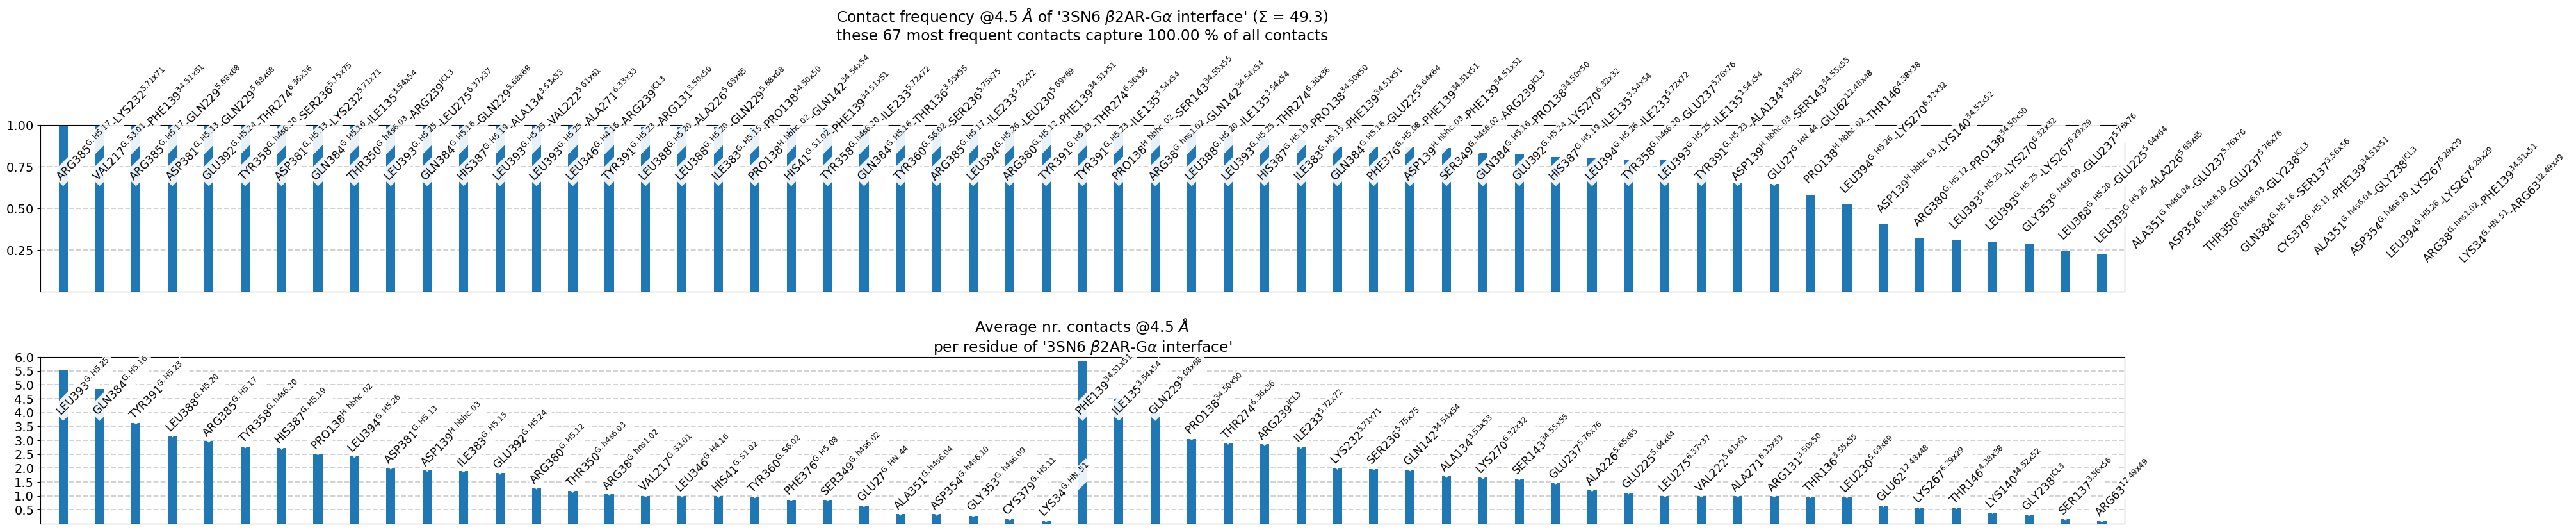

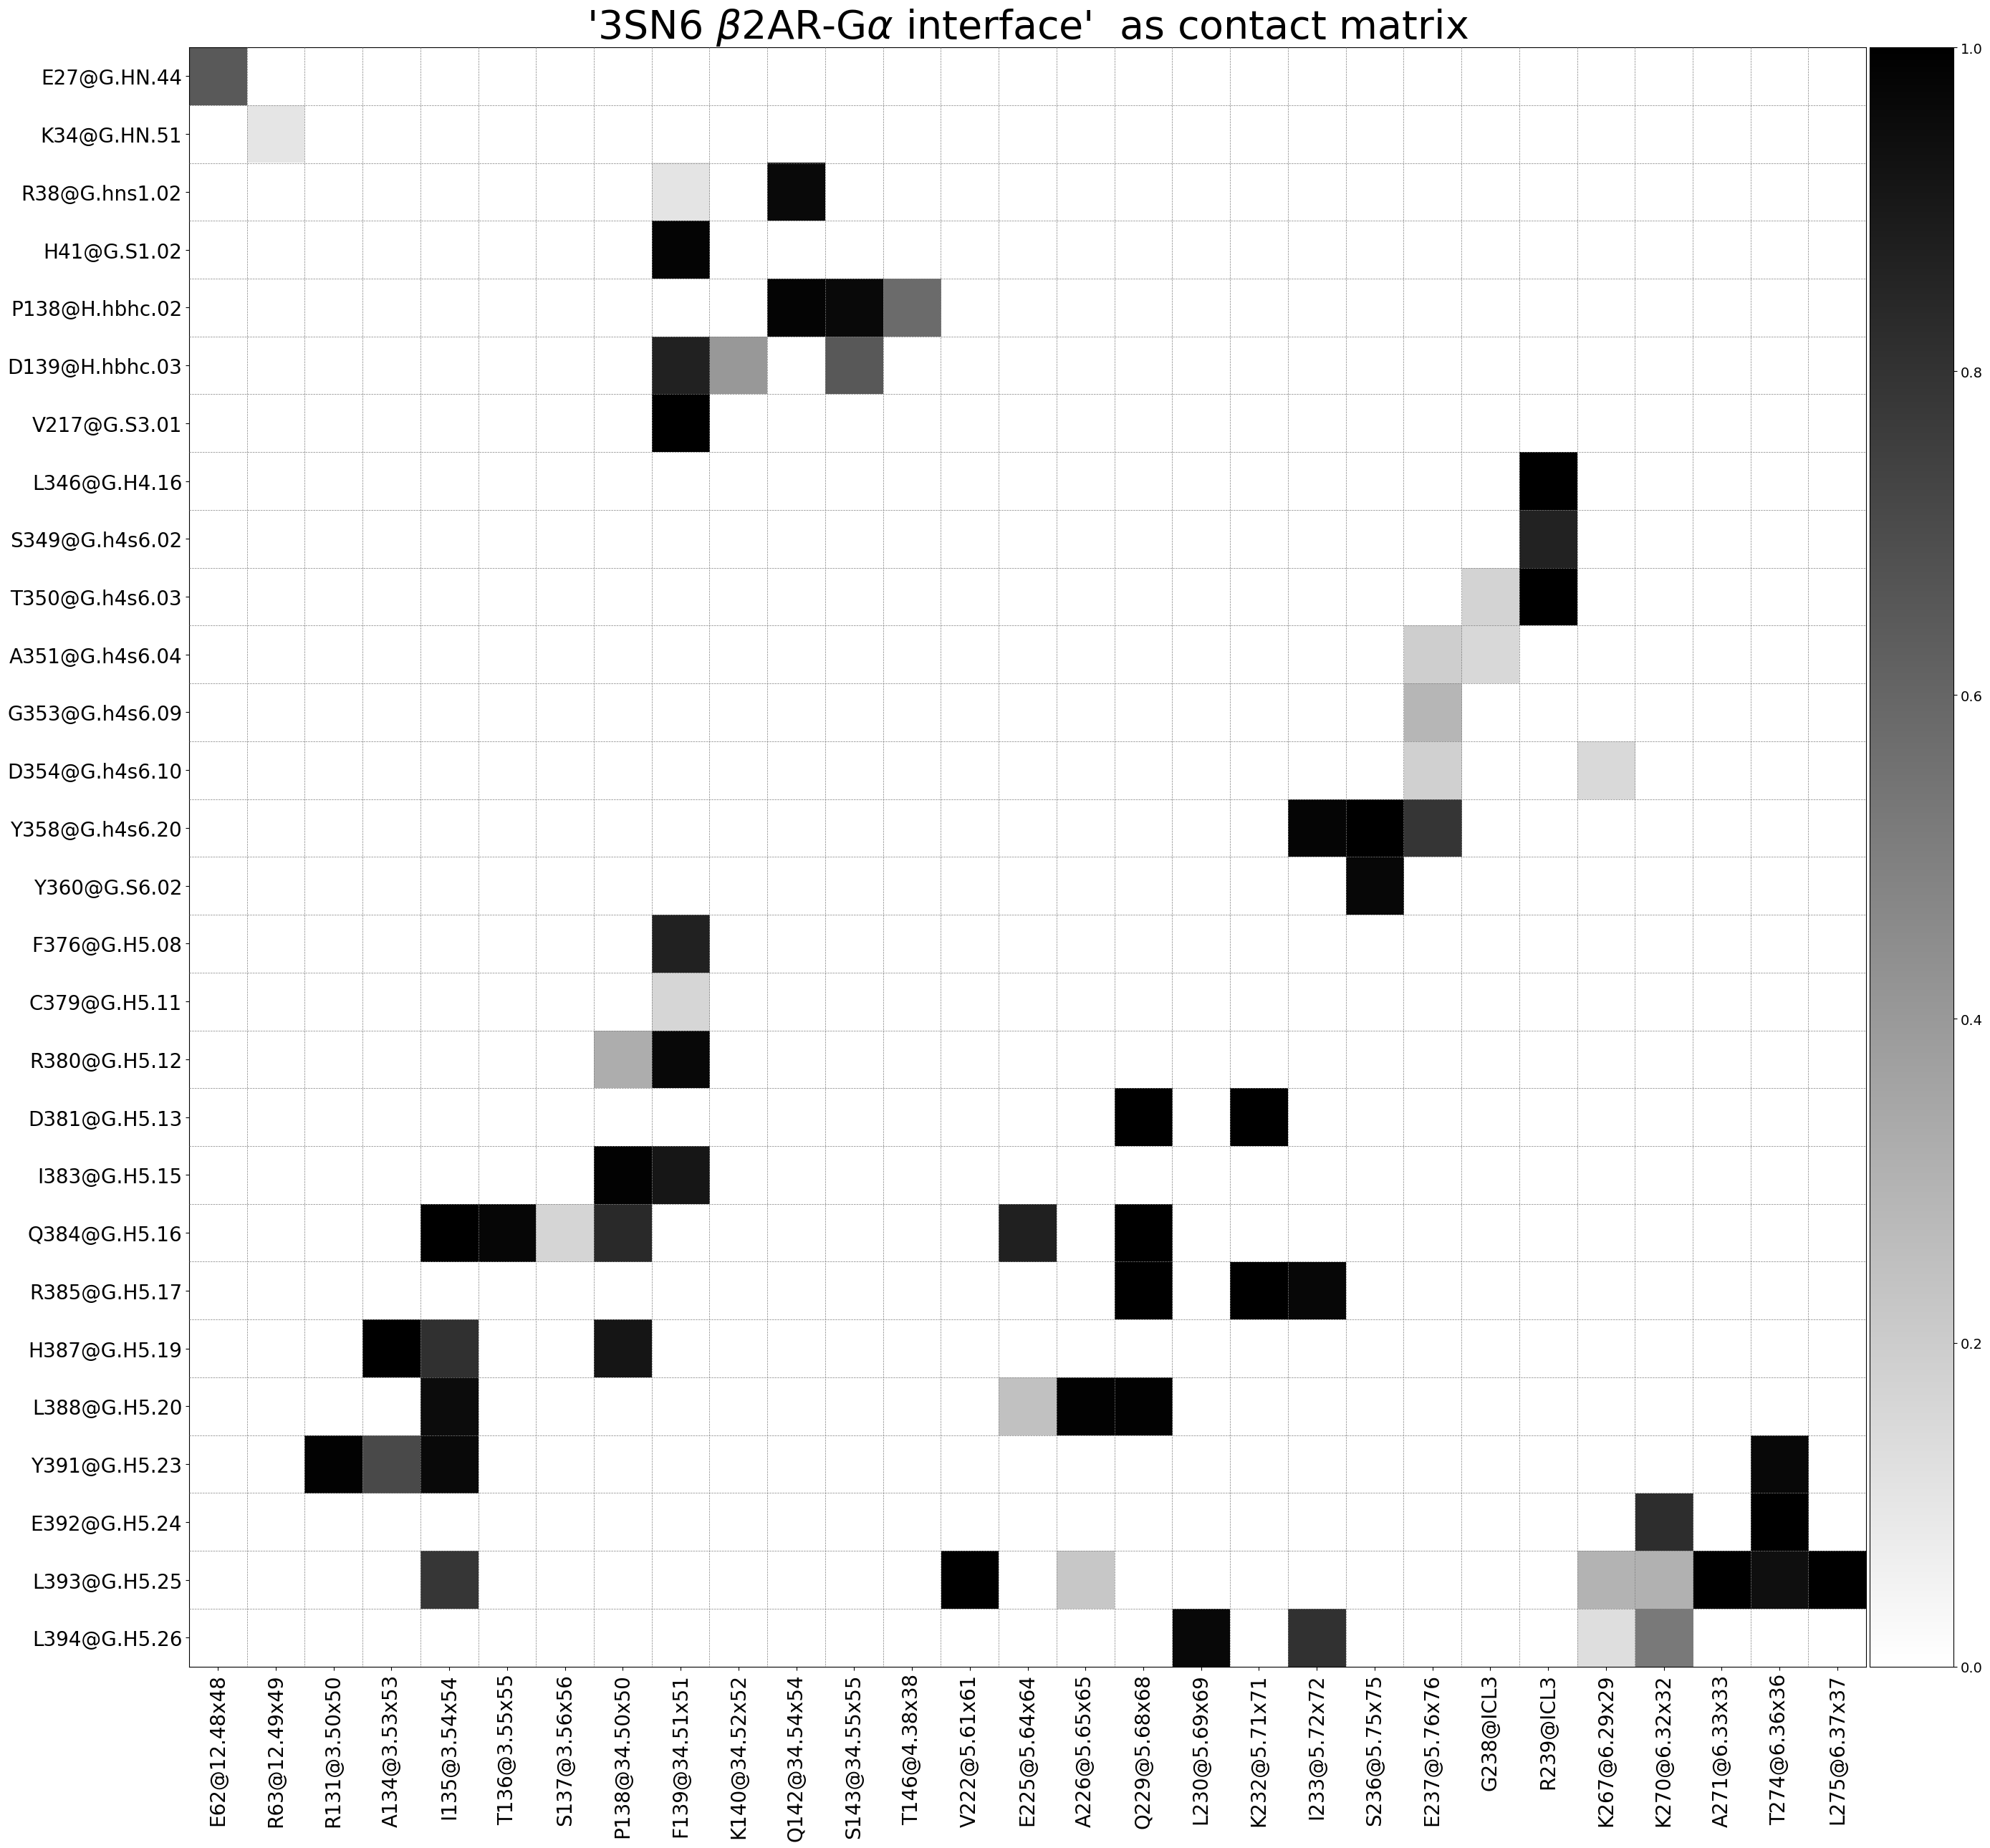

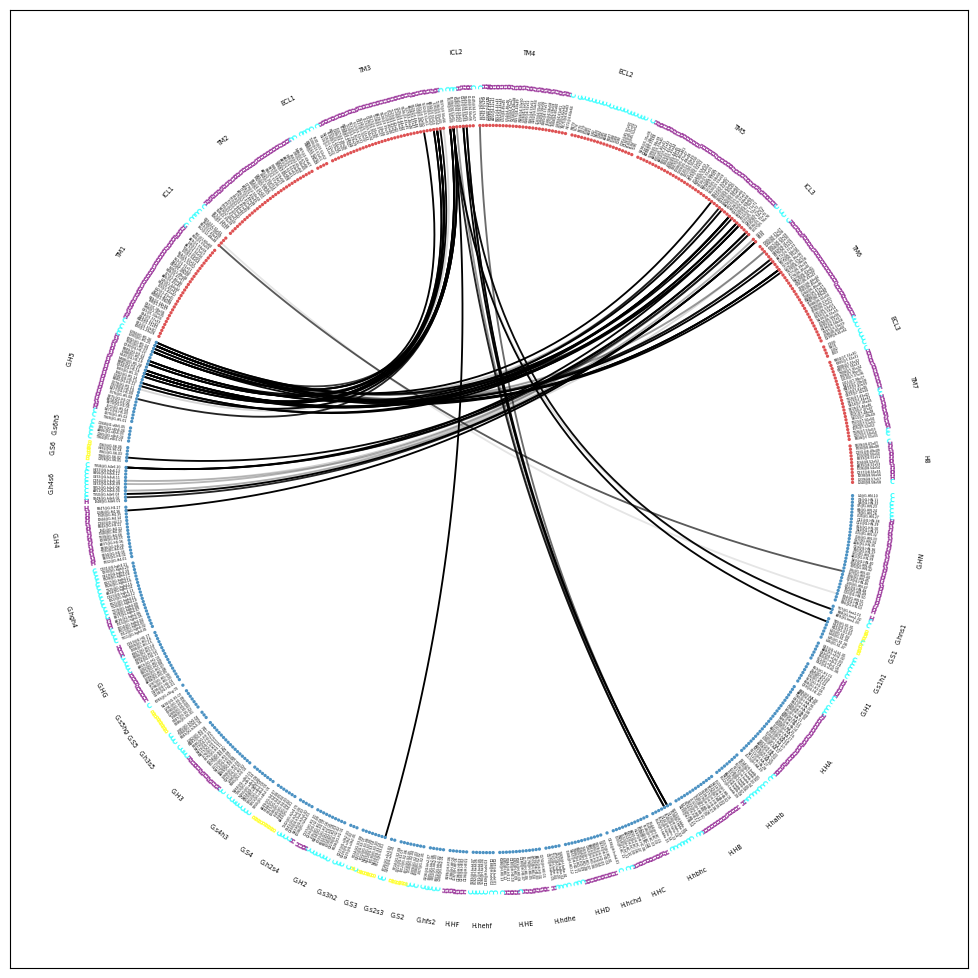

In [15]:
mdciao.cli.interface(traj,
                     interface_selection_1=[0],
                     interface_selection_2=[3],
                     GPCR_UniProt=GPCR,
                     CGN_UniProt=CGN,
                     title="3SN6 beta2AR-Galpha interface",
                     accept_guess=True,
                     plot_timedep=False,
                     ctc_control=1.0,
                     no_disk=True)

## Sites
Now we use a different approach. Instead of letting ``mdciao`` discover contacts automatically, we list them beforehand as ``site`` dictionaries, and feed this dictionaries to directly to the [method](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.sites.html) ``cli.sites``. The CLI command we're replicating is:

```
mdc_sites.py top.pdb traj.xtc --site tip.json -at -nf -sa #sa: short AA-names
```

However, in the API-spirit, we're not even using a file on disk to define the ``site``, but create it on the fly as a Python dictionary:

In [16]:
my_site = {
    "name":"interface small",
    "pairs": {"AAresSeq": [
        "L394-K270",
        "D381-Q229",
        "Q384-Q229",
        "R385-Q229",
        "D381-K232",
        "Q384-I135"
        ]}}

Will compute the sites
 site dict with name 'interface small'
in the trajectories:
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames.

Using method 'None' these fragments were found
fragment 0 with   1044 AAs     LEU4 (   0) -   P0G395 (1043) (0) resSeq jumps
These are the residues that could be found:
   residue      residx    fragment      resSeq
    ASP381         340           0         381
    GLN384         343           0         384
    ARG385         344           0         385
    LEU394         353           0         394
    ILE135         865           0         135
    GLN229         956           0         229
    LYS232         959           0         232
    LYS270         972           0         270


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…


Site 'interface small':
   freq        label   residues fragments   sum
0  0.52  L394 - K270  353 - 972     0 - 0  0.52
1  1.00  D381 - Q229  340 - 956     0 - 0  1.52
2  1.00  Q384 - Q229  343 - 956     0 - 0  2.52
3  1.00  R385 - Q229  344 - 956     0 - 0  3.52
4  1.00  D381 - K232  340 - 959     0 - 0  4.52
5  1.00  Q384 - I135  343 - 865     0 - 0  5.52



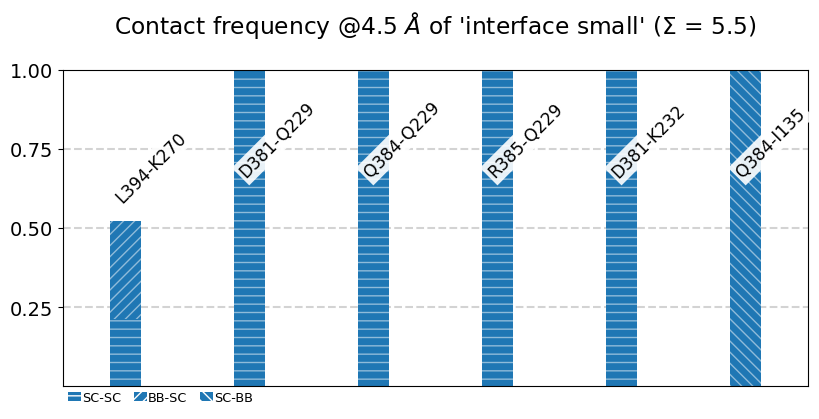

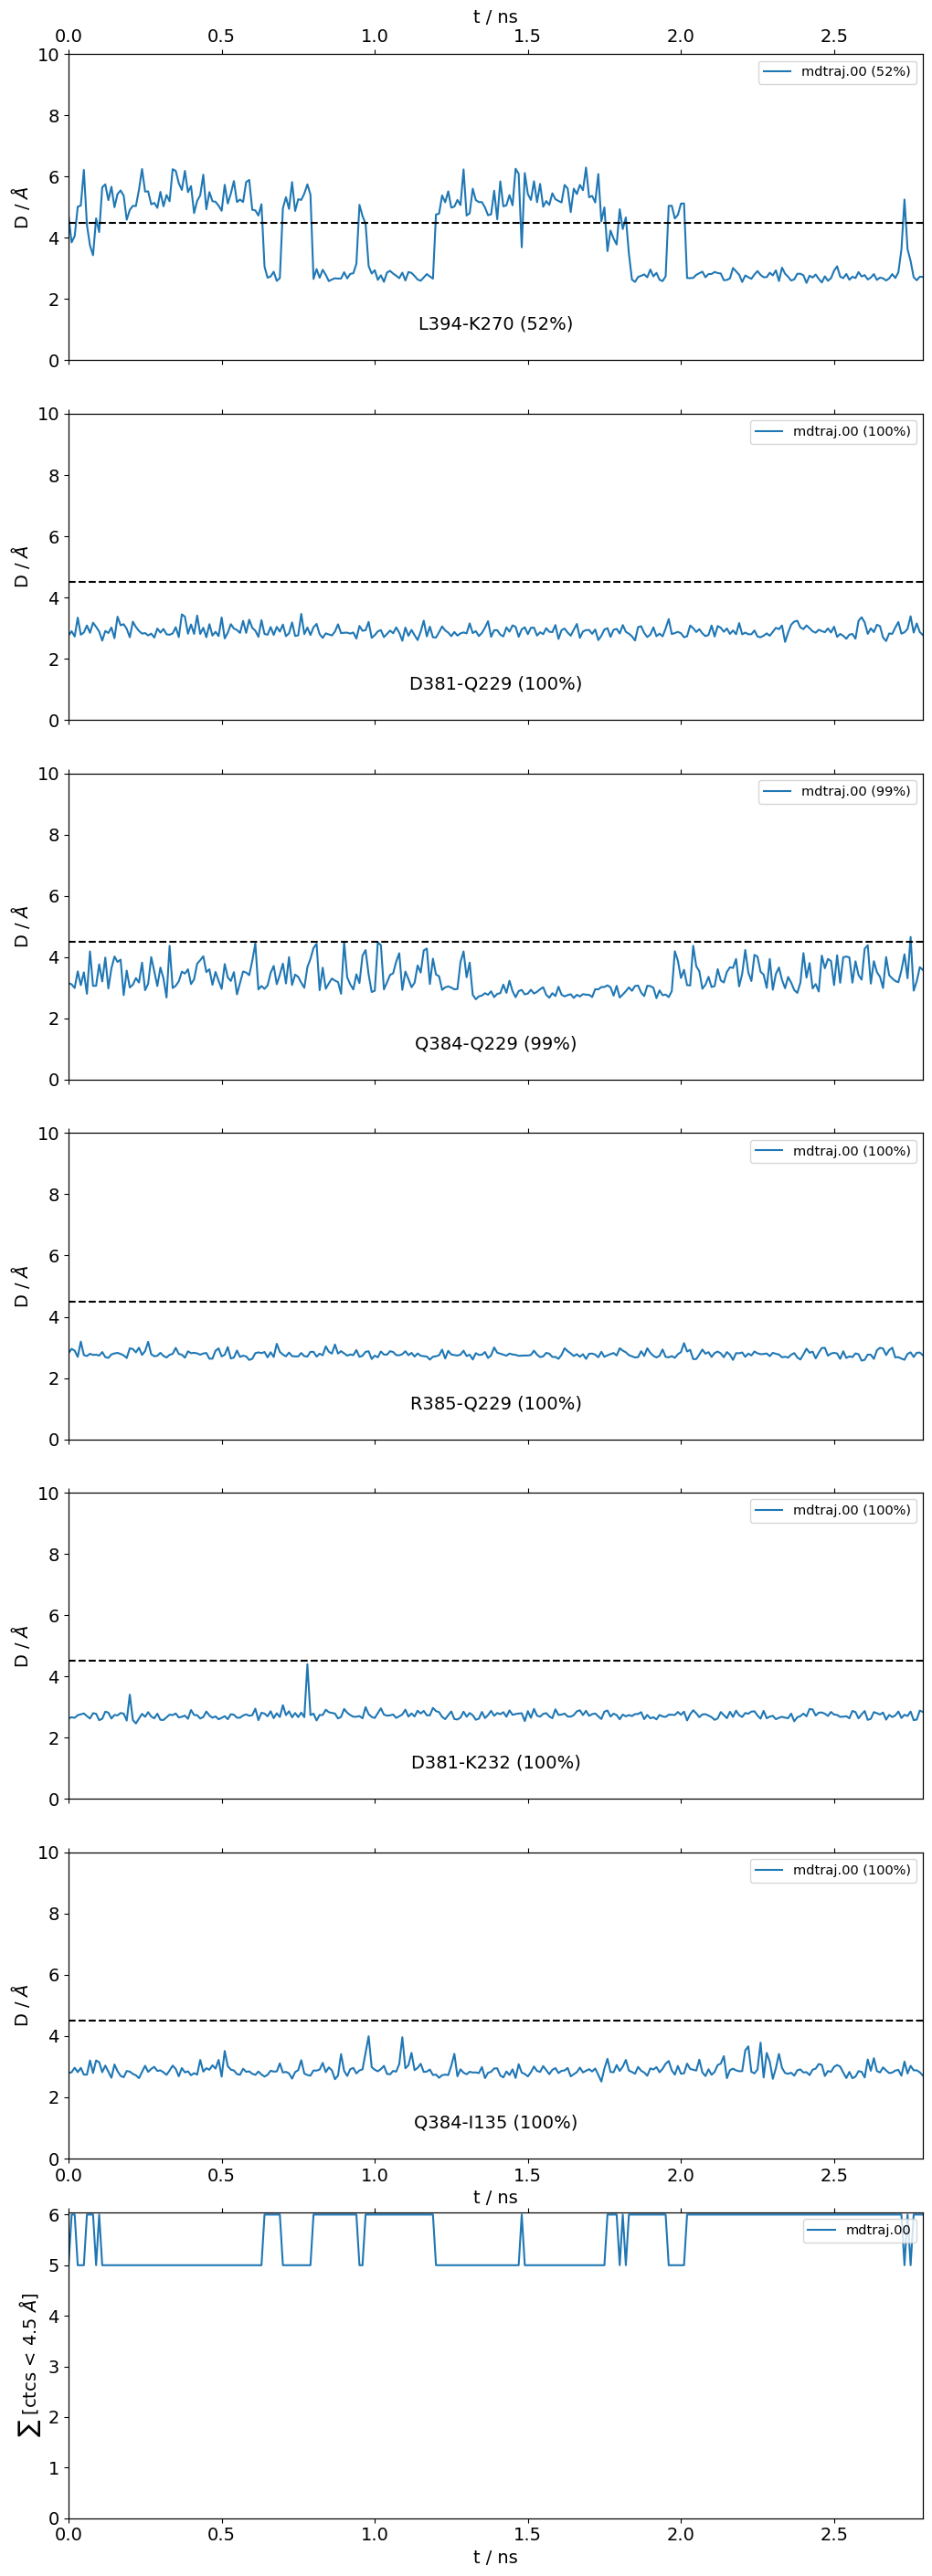

In [17]:
sites = mdciao.cli.sites(my_site,
                         traj,
                         no_disk=True,
                         plot_atomtypes=True,
                         fragments=None,
                         short_AA_names=True)

The return value ``sites`` is a dictionary keyed with the site names (``interface small`` in this case) and valued with ``mdciao's`` [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup)-objects.

In [18]:
sites

{'interface small': <mdciao.contacts.contacts.ContactGroup at 0x79d2619080d0>}

## Contact Groups
The [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) class is at the center of ``mdciao`` and offers extensive of manipulation through it's methods. A helpful analogy would be that, what the [Trajectory](https://mdtraj.org/1.9.4/api/generated/mdtraj.Trajectory.html) is to ``mdtraj``, the [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) is to ``mdciao``. Both classes:
 
 * store a lot of organized information for further use
 * have attributes and methods that can be used standalone
 * can themselves be the input for other methods (of ``mdtraj`` and ``mdciao``, respectively). 
 * are rarely created from scratch, but rather generated by the module itself.

The best way to learn about the [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) is to inspect it with the autocomplete feature if IPython and check the informative names of the attributes and methods.

If you're in a hurry, ``mdciao`` offers a quick way to generate a [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) to play around with and investigate it's methods and attributes:

In [19]:
from mdciao import examples
CG = examples.ContactGroupL394()
CG

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

However, instead of using ``CG`` now, we go back to object ``sites`` that resulted from using ``cli.sites`` above. The returned ``sites``-object is a dictionary keyed with site names (you can compute different sites simultaneously) and valued with [ContactGroups](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup). In our case (check above) we called it it *interface small*

In [20]:
mysite = sites["interface small"]

### Frequencies as Bars
We use the class's method [plot_freqs_as_bars](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_bars) to produce the now familiar neighborhood plots:

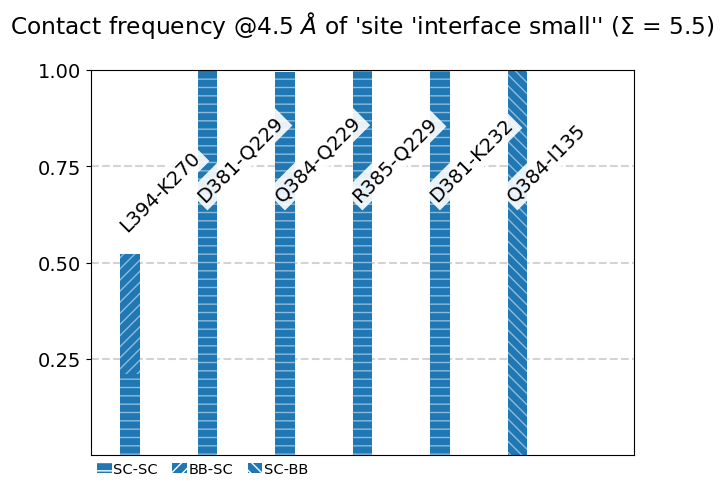

In [21]:
mysite.plot_freqs_as_bars(4.5, 
                          shorten_AAs=True, 
                          defrag="@", 
                          plot_atomtypes=True);

### Frequencies as Distributions
It is also very useful to inspect the residue-residue distances of any [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) by looking at their **overall distributions** instead of their frequencies, since the hard cutoffs can sometimes hide part of the story:

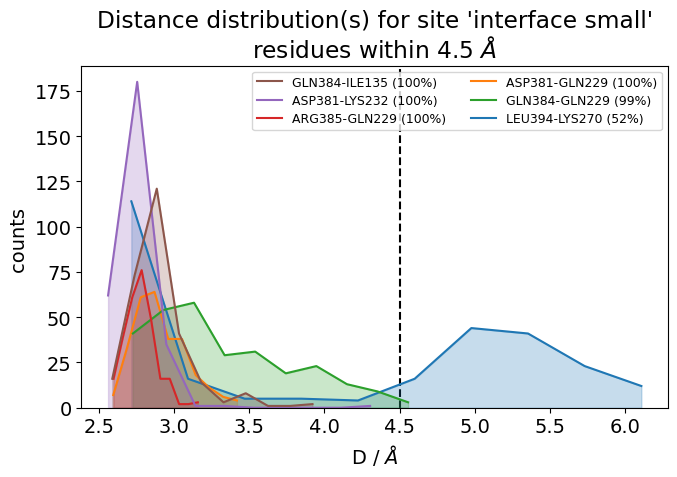

In [22]:
jax = mysite.plot_distance_distributions(defrag="@",
                                         ctc_cutoff_Ang=4.5
                                        )

Please note that, because the example dataset is quite small (280 frames and 2.8 ns) and we are simply histogramming (=counting), the curves aren't very smooth. Histograms of real data will look better.

What we can do is use the `smooth_bw` keyword to smooth a bit the noisy histograms use a [kernel-density estimation using Gaussian kernels](https://matplotlib.org/stable/api/mlab_api.html#matplotlib.mlab.GaussianKDE). The `smooth_bw` parameter has a default bandwidth value of .5 Angstrom (which usually yields good results), but you can adjust it, e.g. here we've changed it to .25. 

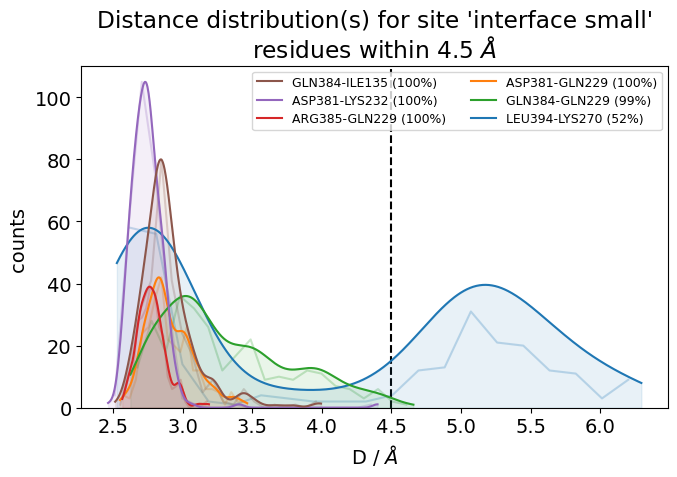

In [23]:
jax = mysite.plot_distance_distributions(bins=20,
                                         defrag="@",
                                         ctc_cutoff_Ang=4.5,
                                         smooth_bw=.25                                         
                                        )

### Frequencies as Violins
Other ways of looking at distance-data as distributions is to use [violin plots](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_violins), which uses a density estimator (check the ``bw_method``-parameter [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html))  to generate smooth densities and plot them vertically. This is somehow in-between the histogram plot and the frequency-bar plot:

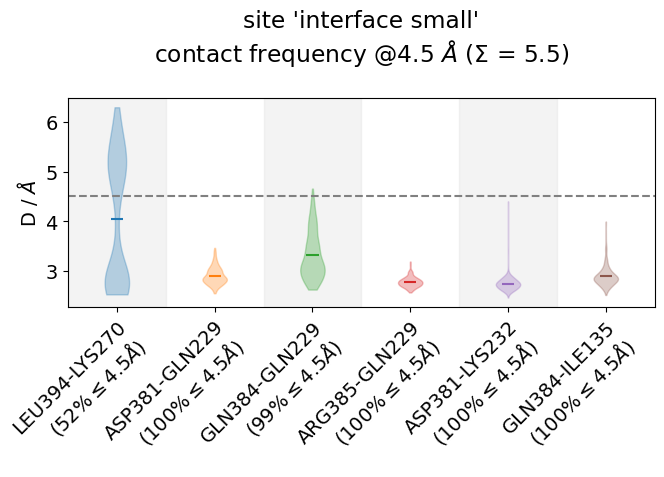

In [24]:
jax = mysite.plot_violins(defrag="@",
                          ctc_cutoff_Ang=4.5,
                          color="tab10", 
                         )

## Comparisons Between Contact Groups
Finally, we replicate the CLI comand

```
mdc_compare.py 3SN6.X.ARG131@4.0_Ang.dat 3SN6.MD.ARG131@4.0_Ang.dat -k Xray,MD -t "3SN6 cutoff 4AA" -a R131
```

in API mode. This looks different because most of the inputs will now be Python objects in memory.

First, we create the Xray and the MD ContactGroups separately:

In [25]:
R131_Xray = mdciao.cli.residue_neighborhoods("R131", xray3SN6, 
                                             ctc_cutoff_Ang=4.5,
                                             no_disk=True,
                                             GPCR_UniProt=GPCR,
                                             figures=False,
                                             CGN_UniProt=CGN,
                                             accept_guess=True)

Will compute contact frequencies for (1 items):
<mdtraj.Trajectory with 1 frames, 10274 atoms, 1319 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment 0 with    349 AAs     THR9 (   0) -   LEU394 (348 ) (0) resSeq jumps
fragment 1 with    340 AAs     GLN1 ( 349) -   ASN340 (688 ) (1)
fragment 2 with     58 AAs     ASN5 ( 689) -    ARG62 (746 ) (2)
fragment 3 with    159 AAs  ASN1002 ( 747) -  ALA1160 (905 ) (3)
fragment 4 with    284 AAs    GLU30 ( 906) -   CYS341 (1189) (4) resSeq jumps
fragment 5 with    128 AAs     GLN1 (1190) -   SER128 (1317) (5)
fragment 6 with      1 AAs  P0G1601 (1318) -  P0G1601 (1318) (6)
The GPCR-labels align best with fragments: [4] (first-last: GLU30-CYS341).

Mapping the GPCR fragments onto your topology:
 TM1  with     32 AAs    GLU30@1.29x29   ( 906) -    PHE61@1.60x60   (937 ) (TM1)
 ICL1 with      4 AAs    GLU62@12.48x48  ( 938) -    GLN65@12.51x51  (941 ) (ICL1)
 TM2  with     32 AAs    

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…


Reduced to only 59 residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…



R131@3.50x50:
The following 5 contacts capture 5.00 (~100%) of the total frequency 5.00 (over 5 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 5 ctcs already capture 90.0% of 5.00.
The 5-th contact has a frequency of 1.00.
   freq            label               residues   fragments  sum
1   1.0  R131@3.50x50 - Y326@7.53x53  1007 - 1174    4 - 4   1.0
2   1.0  R131@3.50x50 - Y391@G.H5.23   1007 - 345    4 - 0   2.0
3   1.0  R131@3.50x50 - V222@5.61x61  1007 - 1095    4 - 4   3.0
4   1.0  R131@3.50x50 - Y219@5.58x58  1007 - 1092    4 - 4   4.0
5   1.0  R131@3.50x50 - I278@6.40x40  1007 - 1126    4 - 4   5.0


In [26]:
R131_MD = mdciao.cli.residue_neighborhoods("R131",traj, 
                                           ctc_cutoff_Ang=4.5,
                                           no_disk=True,
                                           GPCR_UniProt=GPCR,
                                           figures=False,
                                           CGN_UniProt=CGN,
                                           accept_guess=True)

Will compute contact frequencies for (1 items):
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment 0 with    354 AAs     LEU4 (   0) -   LEU394 (353 ) (0) resSeq jumps
fragment 1 with    340 AAs     GLN1 ( 354) -   ASN340 (693 ) (1)
fragment 2 with     66 AAs     ALA2 ( 694) -    PHE67 (759 ) (2)
fragment 3 with    283 AAs    GLU30 ( 760) -   LEU340 (1042) (3) resSeq jumps
fragment 4 with      1 AAs   P0G395 (1043) -   P0G395 (1043) (4)
The GPCR-labels align best with fragments: [3] (first-last: GLU30-LEU340).

Mapping the GPCR fragments onto your topology:
 TM1  with     32 AAs    GLU30@1.29x29   ( 760) -    PHE61@1.60x60   (791 ) (TM1)
 ICL1 with      4 AAs    GLU62@12.48x48  ( 792) -    GLN65@12.51x51  (795 ) (ICL1)
 TM2  with     32 AAs    THR66@2.37x37   ( 796) -    LYS97@2.68x67   (827 ) (TM2)
 ECL1 with      4 AAs    MET98@23.49x49  ( 828) -   PHE101@23.52x52  (83

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…


Reduced to only 75 residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…



R131@3.50x50:
The following 6 contacts capture 3.15 (~99%) of the total frequency 3.17 (over 7 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 4 ctcs already capture 90.0% of 3.17.
The 4-th contact has a frequency of 0.39.
   freq            label               residues  fragments   sum
1  0.99  R131@3.50x50 - Y391@G.H5.23   861 - 350    3 - 0   0.99
2  0.94  R131@3.50x50 - Y326@7.53x53  861 - 1028    3 - 3   1.92
3  0.76  R131@3.50x50 - Y219@5.58x58   861 - 946    3 - 3   2.69
4  0.39  R131@3.50x50 - I278@6.40x40   861 - 980    3 - 3   3.07
5  0.05  R131@3.50x50 - I325@7.52x52  861 - 1027    3 - 3   3.12
6  0.02  R131@3.50x50 - I72@2.43x43    861 - 802    3 - 3   3.15


Please note that, because the molecular topologies differ, the residue ``R131`` is has different indices in each topology, namely 1007 in the X-ray crystal, 861 in the MD simulation:

In [27]:
R131_Xray, R131_MD

({1007: <mdciao.contacts.contacts.ContactGroup at 0x79d2a8805310>},
 {861: <mdciao.contacts.contacts.ContactGroup at 0x79d2a8c17050>})

That will frequently be the case when comparing different proteins of the same family, or topologies where not all sub-units have been modelled, termini have been differently cropped or anything that produces a shift in these indices. 

``mdciao`` *understands* ``R131`` automatically and doesn't ask more questions, as long as there's an obvious ``R131`` candidate. Otherwise the user will be prompted for disambiguation. 

In this case, now we create a dictionary of ContactGroups that represent the R131 in both topologies:

In [28]:
R131 = {
    "Xray": R131_Xray[1007],
    "MD"  : R131_MD[861]
}
#np.save("R131.npz",R131)

Now we can just pass this dictionary to ``cli.compare`` to see their contact frequencies. This method is pretty flexible on inputs and outputs, check the [documentation](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.compare.html#mdciao.cli.compare) to learn more: 

These interactions are not shared:
I325@7.52x52, I72@2.43x43, V222@5.61x61
Their cumulative ctc freq is 1.07. 
Created files
freq_comparison.pdf
freq_comparison.xlsx


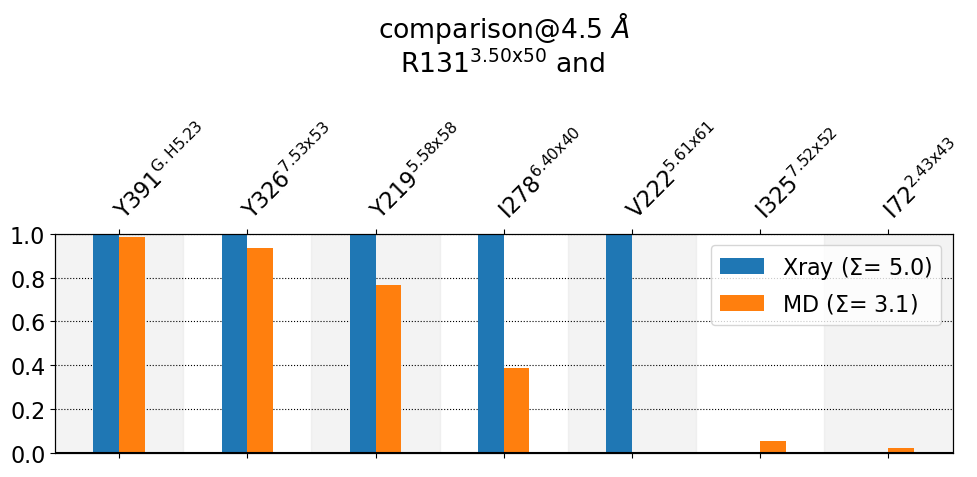

In [29]:
mdciao.cli.compare(R131, ctc_cutoff_Ang=4.5, defrag=None, anchor="R131");